Database successfully reset and data reloaded.
('58e008780aac31001185ed05', 'Owning a cat can reduce the risk of stroke and heart attack by a third.', 'cat', '58e007480aac31001185ecef', 0)
('58e009390aac31001185ed10', "Most cats are lactose intolerant, and milk can cause painful stomach cramps and diarrhea. It's best to forego the milk and just give your cat the standard: clean, cool drinking water.", 'cat', '58e007480aac31001185ecef', 0)
('588e746706ac2b00110e59ff', 'Domestic cats spend about 70 percent of the day sleeping and 15 percent of the day grooming.', 'cat', '588e6e8806ac2b00110e59c3', 0)
('58e008ad0aac31001185ed0c', "The frequency of a domestic cat's purr is the same at which muscles and bones repair themselves.", 'cat', '58e007480aac31001185ecef', 0)
('58e007cc0aac31001185ecf5', 'Cats are the most popular pet in the United States: There are 88 million pet cats and 74 million dogs.', 'cat', '58e007480aac31001185ecef', 0)


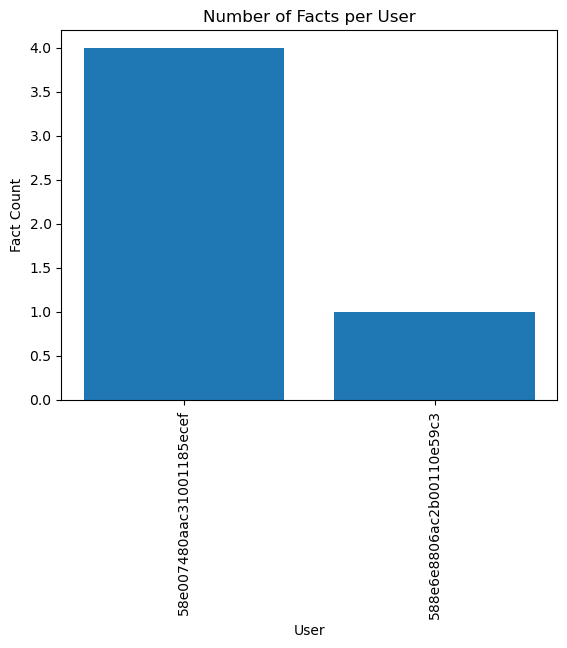

Enter ID:  ceren
Enter cat fact:  1
Enter type:  2
Enter user:  c
Enter upvotes count:  1


Data successfully added.
('58e008780aac31001185ed05', 'Owning a cat can reduce the risk of stroke and heart attack by a third.', 'cat', '58e007480aac31001185ecef', 0)
('58e009390aac31001185ed10', "Most cats are lactose intolerant, and milk can cause painful stomach cramps and diarrhea. It's best to forego the milk and just give your cat the standard: clean, cool drinking water.", 'cat', '58e007480aac31001185ecef', 0)
('588e746706ac2b00110e59ff', 'Domestic cats spend about 70 percent of the day sleeping and 15 percent of the day grooming.', 'cat', '588e6e8806ac2b00110e59c3', 0)
('58e008ad0aac31001185ed0c', "The frequency of a domestic cat's purr is the same at which muscles and bones repair themselves.", 'cat', '58e007480aac31001185ecef', 0)
('58e007cc0aac31001185ecf5', 'Cats are the most popular pet in the United States: There are 88 million pet cats and 74 million dogs.', 'cat', '58e007480aac31001185ecef', 0)
('ceren', '1', '2', 'c', 1)


In [1]:
import requests
import sqlite3
import matplotlib.pyplot as plt

# Function to reset the database
def reset_database():
    # Create database connection
    conn = sqlite3.connect('cat_facts.db')
    cursor = conn.cursor()

    # Drop the existing table
    cursor.execute('DROP TABLE IF EXISTS CatFacts')

    # Create table to store cat facts
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS CatFacts (
            id TEXT PRIMARY KEY,
            text TEXT,
            type TEXT,
            user TEXT,
            upvotes INTEGER
        )
    ''')

    # Send API request
    response = requests.get("https://cat-fact.herokuapp.com/facts")
    data = response.json()

    # Insert data into the table
    for fact in data:
        cursor.execute('''
            INSERT OR IGNORE INTO CatFacts (id, text, type, user, upvotes) VALUES (?, ?, ?, ?, ?)
        ''', (fact['_id'], fact['text'], fact['type'], fact['user'], fact.get('upvotes', 0)))

    # Commit changes and close connection
    conn.commit()
    conn.close()

    print("Database successfully reset and data reloaded.")

# Reset the database
reset_database()

# Function to display all data in the database
def display_all_data():
    # Create database connection
    conn = sqlite3.connect('cat_facts.db')
    cursor = conn.cursor()

    # Select and display all data
    cursor.execute('SELECT * FROM CatFacts')
    rows = cursor.fetchall()

    for row in rows:
        print(row)

    # Close connection
    conn.close()

# Display all data
display_all_data()

# Function to plot data
def plot_data():
    # Create database connection
    conn = sqlite3.connect('cat_facts.db')
    cursor = conn.cursor()

    # Retrieve and process data
    cursor.execute('SELECT user, COUNT(*) as fact_count FROM CatFacts GROUP BY user ORDER BY fact_count DESC')
    rows = cursor.fetchall()

    users = [row[0] for row in rows]
    fact_counts = [row[1] for row in rows]

    # Create plot
    plt.bar(users, fact_counts)
    plt.xlabel('User')
    plt.ylabel('Fact Count')
    plt.title('Number of Facts per User')
    plt.xticks(rotation=90)
    plt.show()

    # Close connection
    conn.close()

# Plot the data
plot_data()

# Function to insert a new cat fact from console input
def insert_cat_fact():
    # Create database connection
    conn = sqlite3.connect('cat_facts.db')
    cursor = conn.cursor()

    # Create table to store cat facts
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS CatFacts (
            id TEXT PRIMARY KEY,
            text TEXT,
            type TEXT,
            user TEXT,
            upvotes INTEGER
        )
    ''')

    # Collect user input
    id = input("Enter ID: ")
    text = input("Enter cat fact: ")
    type = input("Enter type: ")
    user = input("Enter user: ")
    upvotes = input("Enter upvotes count: ")

    # Insert data into table
    cursor.execute('''
        INSERT OR IGNORE INTO CatFacts (id, text, type, user, upvotes) VALUES (?, ?, ?, ?, ?)
    ''', (id, text, type, user, int(upvotes)))
    
    # Commit changes and close connection
    conn.commit()
    conn.close()

    print("Data successfully added.")

# Insert a new cat fact
insert_cat_fact()

# Display all data again to verify insertion
display_all_data()
